## Behavior of the urban traffic of the city of Sao Paulo in Brazil
- Data set from UCI Machine Learning Repository

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from scipy.io import arff

In [2]:
data = arff.loadarff('./Behavior of the urban traffic.arff')

In [3]:
df = pd.DataFrame(data[0])
df.head()

,Hour,Immobilized_bus,Broken_Truck,Vehicle_excess,Accident_victim,Running_over,Fire_vehicles,Occurrence_involving_freight,Incident_involving_dangerous_freight,Lack_of_electricity,Fire,Point_of_flooding,Manifestations,Defect_in_the_network_of_trolleybuses,Tree_on_the_road,Semaphore_off,Intermittent_Semaphore,Slowness_in_traffic_percent
0,b'7:00',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.1
1,b'7:30',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.6
2,b'8:00',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.7
3,b'8:30',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.2
4,b'9:00',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.1


In [17]:
# Creating the images folder for saving the graphs later

image_path = './images/'
if not os.path.exists(image_path):
    os.makedirs(image_path)

### Data Cleaning and Exploratory Data Analysis (EDA)

In [4]:
#decode byte strings into ordinary strings:

df['Hour'] = df['Hour'].str.decode("utf-8")

In [5]:
df.head()

,Hour,Immobilized_bus,Broken_Truck,Vehicle_excess,Accident_victim,Running_over,Fire_vehicles,Occurrence_involving_freight,Incident_involving_dangerous_freight,Lack_of_electricity,Fire,Point_of_flooding,Manifestations,Defect_in_the_network_of_trolleybuses,Tree_on_the_road,Semaphore_off,Intermittent_Semaphore,Slowness_in_traffic_percent
0,7:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.1
1,7:30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.6
2,8:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.7
3,8:30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.2
4,9:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.1


In [6]:
# getting the hours and minutes and adding to a new columns

df['Hour_int'] = pd.DatetimeIndex(df['Hour']).hour
df['Minute_int'] = pd.DatetimeIndex(df['Hour']).minute

In [7]:
df.head()

,Hour,Immobilized_bus,Broken_Truck,Vehicle_excess,Accident_victim,Running_over,Fire_vehicles,Occurrence_involving_freight,Incident_involving_dangerous_freight,Lack_of_electricity,Fire,Point_of_flooding,Manifestations,Defect_in_the_network_of_trolleybuses,Tree_on_the_road,Semaphore_off,Intermittent_Semaphore,Slowness_in_traffic_percent,Hour_int,Minute_int
0,7:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.1,7,0
1,7:30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.6,7,30
2,8:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.7,8,0
3,8:30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.2,8,30
4,9:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.1,9,0


In [8]:
#converting minutes to hour and add them into a new column
df['Minute_to_hour'] = df['Minute_int'].apply(lambda x: x/60)

df['Total_hour'] = df['Hour_int'] + df['Minute_to_hour']

In [9]:
df.head()

,Hour,Immobilized_bus,Broken_Truck,Vehicle_excess,Accident_victim,Running_over,Fire_vehicles,Occurrence_involving_freight,Incident_involving_dangerous_freight,Lack_of_electricity,...,Manifestations,Defect_in_the_network_of_trolleybuses,Tree_on_the_road,Semaphore_off,Intermittent_Semaphore,Slowness_in_traffic_percent,Hour_int,Minute_int,Minute_to_hour,Total_hour
0,7:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.1,7,0,0.0,7.0
1,7:30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.6,7,30,0.5,7.5
2,8:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.7,8,0,0.0,8.0
3,8:30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.2,8,30,0.5,8.5
4,9:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.1,9,0,0.0,9.0


In [10]:
# Dropping some extra columns which is not necessary now, only interested in total hour.

df.drop(['Hour_int', 'Minute_int', 'Minute_to_hour'], axis=1, inplace=True)

In [11]:
# The dataset dates range from December 14, 2009 to December 18, 2009 (From Monday to Friday), 5 days total.
# Defining as: 1 is monday, 2 is Tuesday, and so on.
days = [1, 2, 3, 4, 5]
name_days = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday'}
i = 0

#Creating empty columns
NaN = np.nan
df["day_week"] = NaN
df["name_day_week"] = NaN


for index, row in df.iterrows():
    if index % 27 == 0: #27 because the dataset contains 27 registers for each day.
        day = days[i]
        name_day = name_days[i]
        i += 1
    df.loc[index,'day_week'] = day
    df.loc[index,'name_day_week'] = name_day

In [12]:
df.head()

,Hour,Immobilized_bus,Broken_Truck,Vehicle_excess,Accident_victim,Running_over,Fire_vehicles,Occurrence_involving_freight,Incident_involving_dangerous_freight,Lack_of_electricity,...,Point_of_flooding,Manifestations,Defect_in_the_network_of_trolleybuses,Tree_on_the_road,Semaphore_off,Intermittent_Semaphore,Slowness_in_traffic_percent,Total_hour,day_week,name_day_week
0,7:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.1,7.0,1.0,Monday
1,7:30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.6,7.5,1.0,Monday
2,8:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.7,8.0,1.0,Monday
3,8:30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.2,8.5,1.0,Monday
4,9:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,11.1,9.0,1.0,Monday


In [13]:
df.isnull().sum()

Hour                                     0
Immobilized_bus                          0
Broken_Truck                             0
Vehicle_excess                           0
Accident_victim                          0
Running_over                             0
Fire_vehicles                            0
Occurrence_involving_freight             0
Incident_involving_dangerous_freight     0
Lack_of_electricity                      0
Fire                                     0
Point_of_flooding                        0
Manifestations                           0
Defect_in_the_network_of_trolleybuses    0
Tree_on_the_road                         0
Semaphore_off                            0
Intermittent_Semaphore                   0
Slowness_in_traffic_percent              0
Total_hour                               0
day_week                                 0
name_day_week                            0
dtype: int64

In [14]:
df.shape

(135, 21)

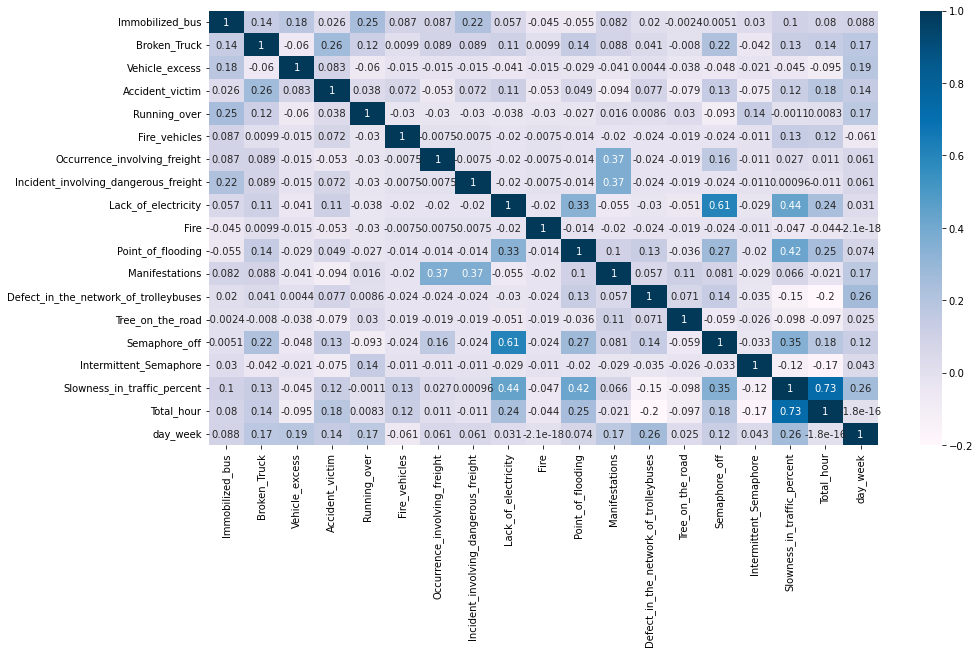

In [18]:
fig = plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot= True, cmap='PuBu')

fig.savefig(image_path + 'correlation_matrix.png')

#### Exploration of the correlation of the data:
- There is a strong correlation between slowness in traffic and hour as well as lack of energy, point of flooding and semaphore off.
- The Correlation between slowness in traffic and day of the week is not so relevant comparing with the hour.
- Also, there is a correlation between lack of energy and semaphore off (which seems to be obvious and natural).

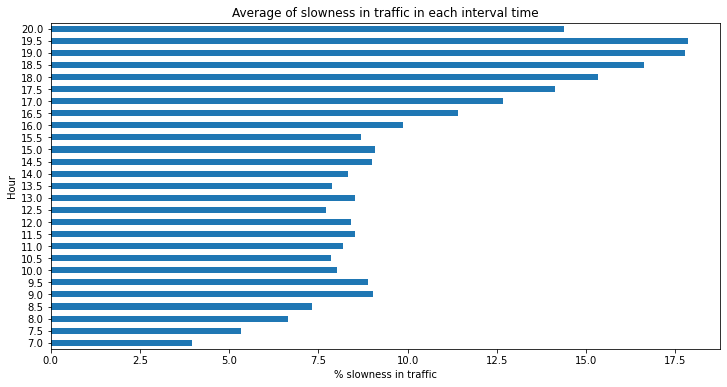

In [40]:
fig = plt.figure(figsize=(12, 6))
df.groupby('Total_hour').Slowness_in_traffic_percent.mean().plot(kind='barh').set_xlabel('% slowness in traffic')
plt.ylabel('Hour')
plt.title('Average of slowness in traffic in each interval time')

plt.show()
fig.savefig(image_path + 'average_slowness_in_traffic.png')

In [41]:
df.head()

,Hour,Immobilized_bus,Broken_Truck,Vehicle_excess,Accident_victim,Running_over,Fire_vehicles,Occurrence_involving_freight,Incident_involving_dangerous_freight,Lack_of_electricity,...,Point_of_flooding,Manifestations,Defect_in_the_network_of_trolleybuses,Tree_on_the_road,Semaphore_off,Intermittent_Semaphore,Slowness_in_traffic_percent,Total_hour,day_week,name_day_week
0,7:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.1,7.0,1.0,Monday
1,7:30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.6,7.5,1.0,Monday
2,8:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.7,8.0,1.0,Monday
3,8:30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.2,8.5,1.0,Monday
4,9:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,11.1,9.0,1.0,Monday


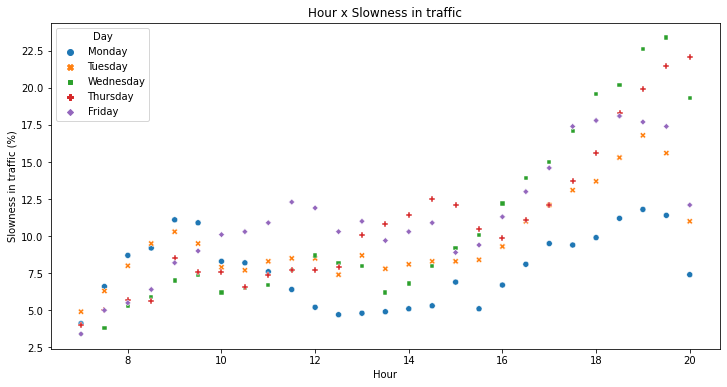

In [43]:
#Let's observe relationship between hour and slowness in traffic in each day.

fig = plt.figure(figsize=(12,6))
sns.scatterplot(data=df, y='Slowness_in_traffic_percent', x='Total_hour', hue='name_day_week', style='name_day_week')
plt.xlabel('Hour')
plt.ylabel('Slowness in traffic (%)')
plt.legend(title='Day')
plt.title('Hour x Slowness in traffic')

plt.show()
fig.savefig(image_path + 'slowness_in_traffic_each_hour.png')

#### Friday did not register peaks of slowness in traffic. Considering that people like to spend the weekend out of town, the trafic should have got worse. Apparently it might have result this because the data were colleted in a week which people spent the week in their homes.

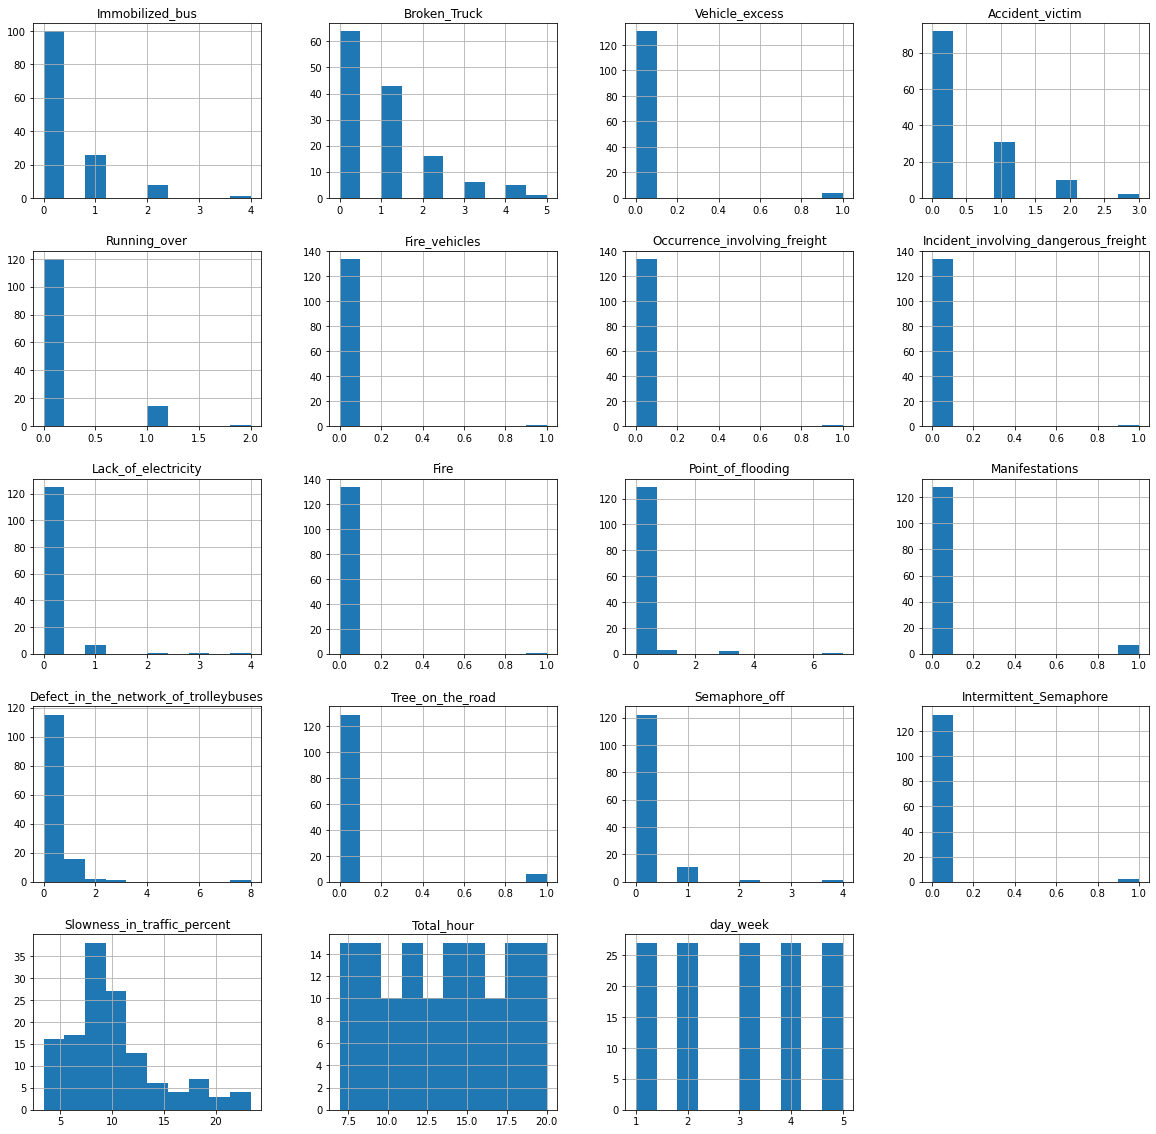

In [51]:
fig_distribution = df.hist(figsize=(20,20))
plt.show()

#### The 'Immobilized_bus', 'Broken_Truck', 'Accident_victim', 'Slowness_in_traffic_percent' values have a different distribution. Lets see how the values in the data are spread out.

In [54]:
dist_df = df[['Immobilized_bus', 'Broken_Truck', 'Accident_victim', 'Slowness_in_traffic_percent']]

In [58]:
dist_df.describe()

,Immobilized_bus,Broken_Truck,Accident_victim,Slowness_in_traffic_percent
count,135.000000,135.000000,135.000000,135.000000
mean,0.340741,0.874074,0.422222,10.051852
std,0.659749,1.102437,0.696116,4.363243
min,0.000000,0.000000,0.000000,3.400000
25%,0.000000,0.000000,0.000000,7.400000
50%,0.000000,1.000000,0.000000,9.000000
75%,1.000000,1.000000,1.000000,11.850000
max,4.000000,5.000000,3.000000,23.400000


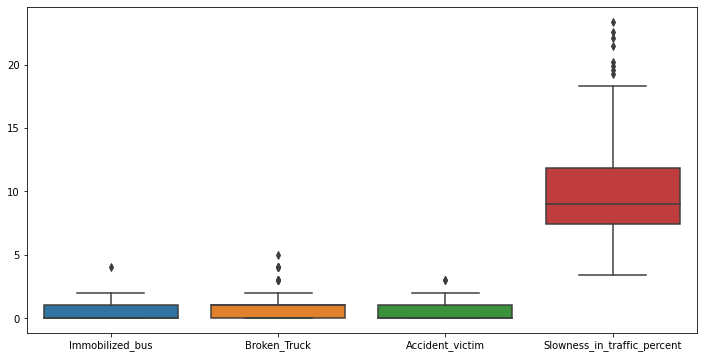

In [59]:
fig = plt.figure(figsize=(12,6))
sns.boxplot(data=dist_df)

plt.show()

fig.savefig(image_path + 'distributions.png')

In [60]:
df[df['Slowness_in_traffic_percent'] >= 18]

,Hour,Immobilized_bus,Broken_Truck,Vehicle_excess,Accident_victim,Running_over,Fire_vehicles,Occurrence_involving_freight,Incident_involving_dangerous_freight,Lack_of_electricity,...,Point_of_flooding,Manifestations,Defect_in_the_network_of_trolleybuses,Tree_on_the_road,Semaphore_off,Intermittent_Semaphore,Slowness_in_traffic_percent,Total_hour,day_week,name_day_week
76,18:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,19.6,18.0,3.0,Wednesday
77,18:30,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,3.0,0.0,0.0,0.0,1.0,0.0,20.2,18.5,3.0,Wednesday
78,19:00,1.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,...,1.0,0.0,0.0,0.0,4.0,0.0,22.6,19.0,3.0,Wednesday
79,19:30,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,23.4,19.5,3.0,Wednesday
80,20:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,19.3,20.0,3.0,Wednesday
104,18:30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,18.3,18.5,4.0,Thursday
105,19:00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,19.9,19.0,4.0,Thursday
106,19:30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,1.0,0.0,0.0,0.0,0.0,21.5,19.5,4.0,Thursday
107,20:00,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,7.0,0.0,2.0,0.0,1.0,0.0,22.1,20.0,4.0,Thursday
131,18:30,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,18.1,18.5,5.0,Friday


In [61]:
df[df['Broken_Truck'] >= 5]

,Hour,Immobilized_bus,Broken_Truck,Vehicle_excess,Accident_victim,Running_over,Fire_vehicles,Occurrence_involving_freight,Incident_involving_dangerous_freight,Lack_of_electricity,...,Point_of_flooding,Manifestations,Defect_in_the_network_of_trolleybuses,Tree_on_the_road,Semaphore_off,Intermittent_Semaphore,Slowness_in_traffic_percent,Total_hour,day_week,name_day_week
44,15:30,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,8.4,15.5,2.0,Tuesday


#### Even though there were 5 trucks broken (outlier) at 15:30 on Tuesday, the slowness in traffic was not so high (only 8.4%)

### After the exploratory data analysis, let's create a model to predict the slowness in traffic (%) and compare with the real values.

In [63]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.7.0


In [62]:
df.head()

,Hour,Immobilized_bus,Broken_Truck,Vehicle_excess,Accident_victim,Running_over,Fire_vehicles,Occurrence_involving_freight,Incident_involving_dangerous_freight,Lack_of_electricity,...,Point_of_flooding,Manifestations,Defect_in_the_network_of_trolleybuses,Tree_on_the_road,Semaphore_off,Intermittent_Semaphore,Slowness_in_traffic_percent,Total_hour,day_week,name_day_week
0,7:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.1,7.0,1.0,Monday
1,7:30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.6,7.5,1.0,Monday
2,8:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.7,8.0,1.0,Monday
3,8:30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.2,8.5,1.0,Monday
4,9:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,11.1,9.0,1.0,Monday


In [64]:
# Split the data into training and test sets
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)

In [65]:
#Split features from labels
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Slowness_in_traffic_percent')
test_labels = test_features.pop('Slowness_in_traffic_percent')

In [67]:
# Dropping object type columns which is not necessary.

train_features.drop(['Hour', 'name_day_week'], axis=1, inplace=True)
test_features.drop(['Hour', 'name_day_week'], axis=1, inplace=True)

In [68]:
print(train_features.shape)
print(test_features.shape)
print(train_labels.shape)
print(test_labels.shape)

(108, 18)
(27, 18)
(108,)
(27,)


In [69]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
Immobilized_bus,0.342593,0.672032
Broken_Truck,0.962963,1.183421
Vehicle_excess,0.027778,0.165102
Accident_victim,0.370370,0.649840
Running_over,0.092593,0.321708
Fire_vehicles,0.009259,0.096225
Occurrence_involving_freight,0.009259,0.096225
Incident_involving_dangerous_freight,0.009259,0.096225
Lack_of_electricity,0.129630,0.531135
Fire,0.009259,0.096225


In [70]:
# even though our features are not in differents scales and ranges, I will normalize them.

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

In [71]:
# creating the model

linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

linear_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 18)               37        
 n)                                                              
                                                                 
 dense (Dense)               (None, 1)                 19        
                                                                 
Total params: 56
Trainable params: 19
Non-trainable params: 37
_________________________________________________________________


In [72]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [73]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Wall time: 5.29 s


In [74]:
test_result = linear_model.evaluate(test_features, test_labels, verbose=0)
print(test_result)

1.9738835096359253


#### The result is a mean absolute error (MAE) of 1.97. This means it predicts slowness in traffic correctly within 1.97%

In [75]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Slowness traffic]')
  plt.legend()
  plt.grid(True)

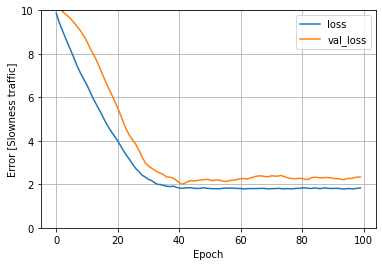

In [76]:
plot_loss(history)

In [77]:
test_predictions = linear_model.predict(test_features).flatten()

In [90]:
#Checking for the first row features of the trafic.

print(f"The features of the trafic conditions:\n{test_features.iloc[0]}\n")
print(f"The true value for the slowness in traffic in the data set is {test_labels.iloc[0]}")
print(f"The prediction value for the slowness in traffic is {test_predictions[0]:.2f}")

The features of the trafic conditions:
Immobilized_bus                           0.0
Broken_Truck                              0.0
Vehicle_excess                            0.0
Accident_victim                           0.0
Running_over                              0.0
Fire_vehicles                             0.0
Occurrence_involving_freight              0.0
Incident_involving_dangerous_freight      0.0
Lack_of_electricity                       0.0
Fire                                      0.0
Point_of_flooding                         0.0
Manifestations                            0.0
Defect_in_the_network_of_trolleybuses     0.0
Tree_on_the_road                          0.0
Semaphore_off                             0.0
Intermittent_Semaphore                    0.0
Total_hour                               11.5
day_week                                  1.0
Name: 9, dtype: float64

The true value for the slowness in traffic in the data set is 6.4
The prediction value for the slowness in t

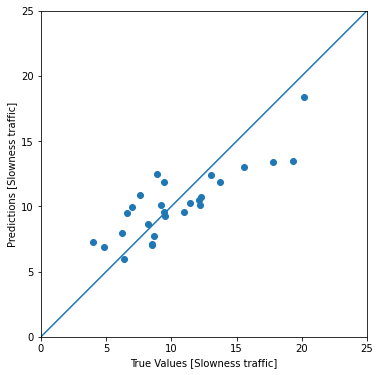

In [91]:
fig = plt.figure(figsize=(10, 6))
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Slowness traffic]')
plt.ylabel('Predictions [Slowness traffic]')
lims = [0, 25]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

fig.savefig(image_path + 'true_vs_prediction.png')

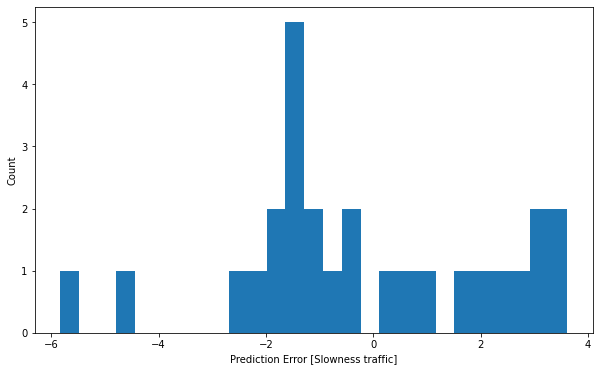

In [92]:
fig = plt.figure(figsize=(10, 6))
error = test_predictions - test_labels
plt.hist(error, bins=27)
plt.xlabel('Prediction Error [Slowness traffic]')
_ = plt.ylabel('Count')

fig.savefig(image_path + 'prediction_error.png')

#### There is one case which we got an error of almost -6. True value should be aprox. 19 and the model predicts aprox. 13

In [80]:
#Saving the model
linear_model.save('linear_model')

INFO:tensorflow:Assets written to: linear_model\assets


In [81]:
#Saving the df

df.to_csv('./behavior_urban_traffic_sao_paulo_brazil.csv', index=False)